In [1]:
%matplotlib inline

In [2]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits import basemap

In [3]:
basemap.__version__

'1.0.8'

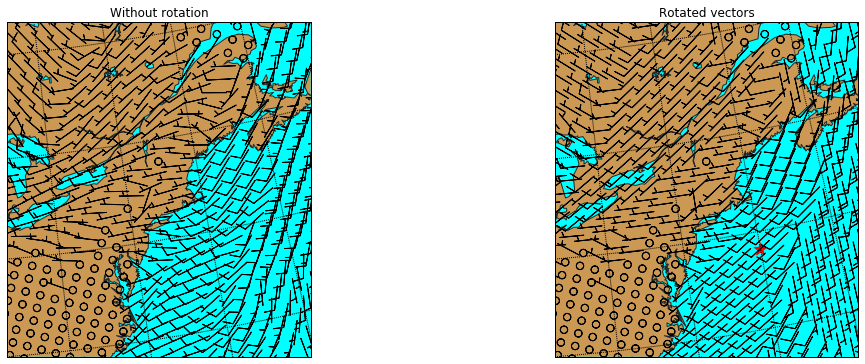

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Read the npz file
dat=np.load('/Users/huziy/Downloads/rotate_vector_inputs.npz')
u=dat['u']
v=dat['v']
nio_lons=dat['lons']
nio_lats=dat['lats']

# Skip factor so we do not overwhelm the plot (this is ~ a 3 km grid)
skip=25
u10=u[::skip,::skip,0]
v10=v[::skip,::skip,0]
lats=nio_lats[::skip,::skip]
lons=nio_lons[::skip,::skip]

# Create the figure
fig=plt.figure(figsize=(18, 6)) 

# Domain covers NE CONUS
llcrnrlon=-84.0
llcrnrlat=35.0
urcrnrlon=-60.0
urcrnrlat=49.0
res='l'

m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,\
          rsphere=(6378137.00,6356752.3142),\
          resolution=res,projection='lcc',\
          lat_1=25.0,lon_0=-95.0)

#The vector rotation to the Basemap projection just specified
u10_rot, v10_rot, x, y = m.rotate_vector(u10, v10, lons, lats, returnxy=True)

parallels = np.arange(-80.,90,5.)
meridians = np.arange(0.,360.,5.)

# - First sublot is without rotation
ax = fig.add_subplot(121)
ax.set_title('Without rotation')

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#cc9955', lake_color='aqua', zorder = 0)
m.drawcoastlines(color = '0.15')

m.drawparallels(parallels)
m.drawmeridians(meridians)

m.barbs(x, y, u10, v10, 
    pivot='middle', barbcolor='black',zorder=10)

# - Second subplot is with rotation

ax = fig.add_subplot(122)
ax.set_title('Rotated vectors')

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#cc9955', lake_color='aqua', zorder = 0)
m.drawcoastlines(color = '0.15')
m.drawparallels(parallels)
m.drawmeridians(meridians)
m.barbs(x, y, u10_rot, v10_rot, 
    pivot='middle', barbcolor='black',zorder=10)

m.scatter(-70.0144,39.11,s=175,color='red',marker='*',latlon=True)

In [5]:
i, j = np.where(abs(nio_lons + 70.0144) < 0.00001 )

In [6]:
#The vector rotation to the Basemap projection just specified
u10_rot, v10_rot, x, y = m.rotate_vector(u[i, j], v[i, j], nio_lons[i, j], nio_lats[i, j], returnxy=True)

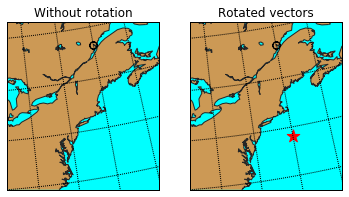

In [7]:
fig = plt.figure()
# - First sublot is without rotation
ax = fig.add_subplot(121)
ax.set_title('Without rotation')

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#cc9955', lake_color='aqua', zorder = 0)
m.drawcoastlines(color = '0.15')

m.drawparallels(parallels)
m.drawmeridians(meridians)

m.barbs(x, y, u[i,j], v[i, j], 
    pivot='middle', barbcolor='black',zorder=10)

# - Second subplot is with rotation

ax = fig.add_subplot(122)
ax.set_title('Rotated vectors')

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#cc9955', lake_color='aqua', zorder = 0)
m.drawcoastlines(color = '0.15')
m.drawparallels(parallels)
m.drawmeridians(meridians)
m.barbs(x, y, u10_rot, v10_rot, 
    pivot='middle', barbcolor='black',zorder=10)

m.scatter(-70.0144,39.11,s=175,color='red',marker='*',latlon=True)